In [241]:
import re
import glob
import csv
import logging
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [232]:
# Set up the logger
log_dir = 'logs/'
log_name = 'CCPI_wrangle.log'
if not os.path.exists(log_dir): os.makedirs(log_dir)
log_format = "%(levelname)s %(asctime)s - %(message)s"
logging.basicConfig(
    level=logging.INFO,
    format=log_format,
    handlers=[
        logging.FileHandler(f'{log_dir}{log_name}', mode='w'),
        logging.StreamHandler(sys.stdout)
    ]
)
logger = logging.getLogger()

In [233]:
filenames = glob.glob('./CCPI/texts/*.txt')
filenames

['./CCPI/texts/2016.txt',
 './CCPI/texts/2017.txt',
 './CCPI/texts/2015.txt',
 './CCPI/texts/2014.txt',
 './CCPI/texts/2010.txt',
 './CCPI/texts/2011.txt',
 './CCPI/texts/2007.txt',
 './CCPI/texts/2013.txt',
 './CCPI/texts/2012.txt',
 './CCPI/texts/2022.txt',
 './CCPI/texts/2008.txt',
 './CCPI/texts/2020.txt',
 './CCPI/texts/2021.txt',
 './CCPI/texts/2009.txt',
 './CCPI/texts/2019.txt',
 './CCPI/texts/2018.txt']

In [234]:
YEARS = [
    '2008','2009','2010','2011','2012',
    '2013','2014','2015','2016','2017',
    '2018','2019','2020','2021','2022'
]

In [235]:
with open('./CCPI/ccpi.csv', 'w') as w:
    w.write('Year,Rank,Country,Index\n')
    for file in filenames:
        year = re.findall('([0-9]+)', file)

        with open(file) as r:
            lines = r.readlines()
            
            for line in lines:
                # Skip lines with no letters
                if not re.findall('[a-zA-Z]', line):
                    continue

                # Remove newlines and commas
                data = line.strip('\n')
                data = data.replace(',','')

                # Remove any '.' that has a number before it but not after
                data = re.sub(r'(?<=\d)(\.)(?!\d)', '', data)

                # Remove any '.' that neither has number before nor after
                data = re.sub(r'(?<!\d)(\.)(?!\d)', '', data)

                # Replace any space not after or before any digit with a comma
                data = re.sub(r'(?<=\d)( )|( )(?=\d)', ',', data)

                # Replace any space before a minus sign with a comma
                data = re.sub(r'( )(?=\-)', ',', data)

                w.write(f'{year[0]},{data}\n')

                

In [238]:
df = pd.read_csv("./CCPI/ccpi.csv")

In [256]:
aus = df[df.Country == 'Australia'].sort_values(by=['Year'])
aus.to_csv('./CCPI/aus.csv', index=False)
aus

,Year,Rank,Country,Index
392,2007,47,Australia,-0.45
632,2008,54,Australia,35.50
802,2009,55,Australia,41.70
285,2010,57,Australia,41.90
343,2011,58,Australia,42.90
504,2012,48,Australia,49.80
438,2013,40,Australia,55.39
227,2014,57,Australia,41.53
172,2015,60,Australia,35.57
55,2016,59,Australia,36.56


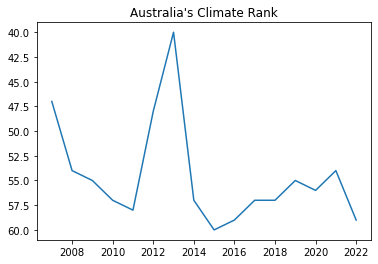

In [261]:
plt.plot(aus['Year'], aus['Rank'])
plt.title("Australia's Climate Rank")
plt.gca().invert_yaxis()